A typical digital image is made by stacking Red Blue and Green pixel arrays of intensities ranging from 0 to 255.

<img src="img/RGB.png">

A grayscale image does not contain color but only shades of gray. The pixel intensity in a grayscale image varies from black (0 intensity) to white (255 full intensity) to make it what we usually call as a Black & White image.

Digits dataset is a grayscale image dataset of handwritten digit having 1797 8×8 images.

In [11]:
#importing the dataset
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
 
digits = load_digits()
data = digits.data
data.shape

(1797, 64)

In [12]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

sklearn.datasets module makes it quick to import digits data by importing load_digits class from it. The shape of the digit data is (1797, 64). 8×8 pixels are flattened to create a vector of length 64 for every image.

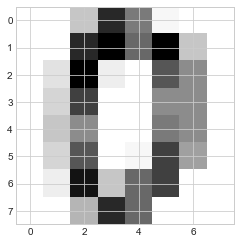

In [13]:
#taking a sample image to view
#Remember image is in the form of numpy array.
image_sample = data[0,:].reshape(8,8)
plt.imshow(image_sample)

Now, using PCA, let’s reduce the image dimensions from 64 to just 2 so that we can visualize the dataset using a Scatterplot.

In [14]:
from sklearn.decomposition import PCA

pca = PCA(2)
converted_data = pca.fit_transform(digits.data)

converted_data.shape

(1797, 2)

We can also pass a float value less than 1 instead of an integer number. i.e. PCA(0.90) this means the algorithm will find the principal components which explain 90% of the variance in data.

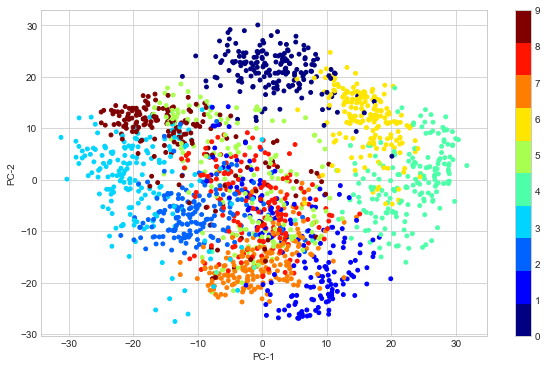

In [15]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (10,6))
c_map = plt.cm.get_cmap('jet', 10)
plt.scatter(converted_data[:, 0], converted_data[:, 1], s = 15,
            cmap = c_map , c = digits.target)
plt.colorbar()
plt.xlabel('PC-1') , plt.ylabel('PC-2')
plt.show()

Another cool application of PCA is in Image compression. Let’s have a look at how can we achieve this with python.

In [1]:
# Importing required libraries
import cv2
import numpy as np
from sklearn.decomposition import PCA

<IPython.core.display.Javascript object>

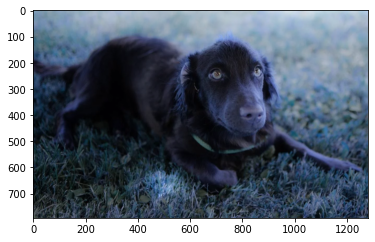

In [2]:
# Loading the image 
img = cv2.imread('img/my_doggo_sample.jpeg')
plt.imshow(img);

In [3]:
img.shape

(793, 1280, 3)

In [19]:
# Splitting the image in R,G,B arrays.
blue, green, red = cv2.split(img)

#it will split the original image into Blue, Green and Red arrays.

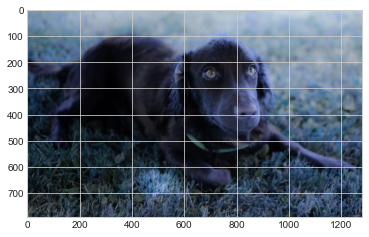

In [20]:
img_not_compressed = cv2.merge([blue, green, red])
#viewing the not compressed image
plt.imshow(img_not_compressed);

OpenCV will split into Blue, Green, and Red channels instead of Red, Blue, and Green. Be very careful of the sequence here.

In [26]:
# Initialize PCA with first 20 principal components
pca = PCA(20)
 
#Applying to red channel and then applying inverse transform to transformed array.
red_transformed = pca.fit_transform(red)
print('red_transformed.shape:', red_transformed.shape)
red_inverted = pca.inverse_transform(red_transformed)
print('red_inverted.shape:', red_inverted.shape)
 
#Applying to Green channel and then applying inverse transform to transformed array.
green_transformed = pca.fit_transform(green)
print('green_transformed.shape:', green_transformed.shape)
green_inverted = pca.inverse_transform(green_transformed)
print('green_inverted.shape:', green_inverted.shape)
 
#Applying to Blue channel and then applying inverse transform to transformed array.
blue_transformed = pca.fit_transform(blue)
print('blue_transformed.shape:', blue_transformed.shape)
blue_inverted = pca.inverse_transform(blue_transformed)
print('blue_inverted.shape:', blue_inverted.shape)

red_transformed.shape: (793, 20)
red_inverted.shape: (793, 1280)
green_transformed.shape: (793, 20)
green_inverted.shape: (793, 1280)
blue_transformed.shape: (793, 20)
blue_inverted.shape: (793, 1280)


In the process of reconstructing the original dimensions from the reduced dimensions, some information is lost as we keep only selected principal components, 20 in this case.

In [22]:
img_compressed = (cv2.merge([blue_inverted, green_inverted, red_inverted])).astype(np.uint8)

Stacking the inverted arrays using dstack function. Here it is important to specify the datatype of our arrays, as most images are of 8 bit. Each pixel is represented by one 8-bit byte.

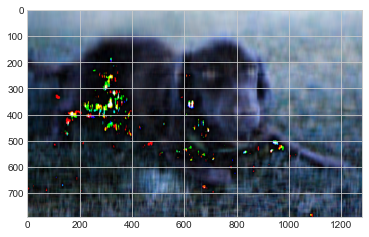

In [23]:
#viewing the compressed image
plt.imshow(img_compressed);

The output above is what we get when considering just 20 Principal components.

If we increase the number of Principal components the output image will get clear.

1) Now check with how many Principal Components your eyes can't see the difference with the original!

2) The dog should not be so blue, fix it!

In [53]:
def pc(p):
    # Initialize PCA with first 20 principal components
    pca = PCA(p)
    
    #Applying to red channel and then applying inverse transform to transformed array.
    red_transformed = pca.fit_transform(red)
    print('red_transformed.shape:', red_transformed.shape)
    red_inverted = pca.inverse_transform(red_transformed)
    print('red_inverted.shape:', red_inverted.shape)
    
    #Applying to Green channel and then applying inverse transform to transformed array.
    green_transformed = pca.fit_transform(green)
    print('green_transformed.shape:', green_transformed.shape)
    green_inverted = pca.inverse_transform(green_transformed)
    print('green_inverted.shape:', green_inverted.shape)
    
    #Applying to Blue channel and then applying inverse transform to transformed array.
    blue_transformed = pca.fit_transform(blue)
    print('blue_transformed.shape:', blue_transformed.shape)
    blue_inverted = pca.inverse_transform(blue_transformed)
    print('blue_inverted.shape:', blue_inverted.shape)

    img_compressed = (cv2.merge([red_inverted, green_inverted, blue_inverted])).astype(np.uint8)

    plt.figure(figsize=(10,10))
    plt.imshow(img_compressed);

red_transformed.shape: (793, 380)
red_inverted.shape: (793, 1280)
green_transformed.shape: (793, 380)
green_inverted.shape: (793, 1280)
blue_transformed.shape: (793, 380)
blue_inverted.shape: (793, 1280)


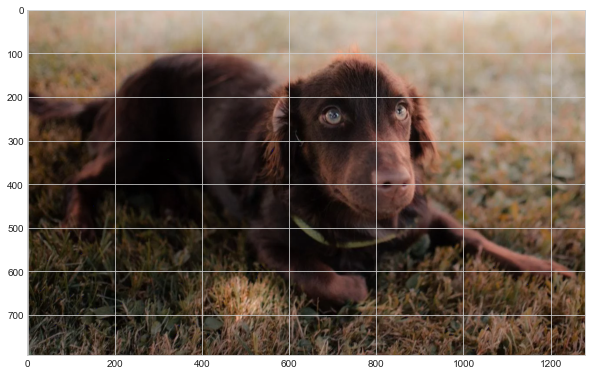

In [54]:
pc(380)